# Movie Era Classification

Oftentimes, we arbitrarily categorize things based on a general vibe. Is there anything more substantial to the subdivisions of movie eras beyond a general aesthetic? Can we reliably distinguish the eras of movie making based solely on the posters or movie stills? I want to explore the aesthetics of different movie eras while learning new tools like PyTorch and Python Image Library for image classification and exploration. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

<h2><u>Data Exploration</u></h2>

<h3>Metadata</h3>

In [2]:
df = pd.read_csv('./data/metadata.csv')
df.head()

,filename,title,release_year
0,15.jpg,Citizen Kane,1941
1,16442.jpg,Sergeant York,1941
2,43266.jpg,How Green Was My Valley,1941
3,11462.jpg,Suspicion,1941
4,29884.jpg,Ball of Fire,1941


In [3]:
# should be no invalid data because of the way we pulled it, but checking anyway
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filename      4700 non-null   object
 1   title         4700 non-null   object
 2   release_year  4700 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 110.3+ KB


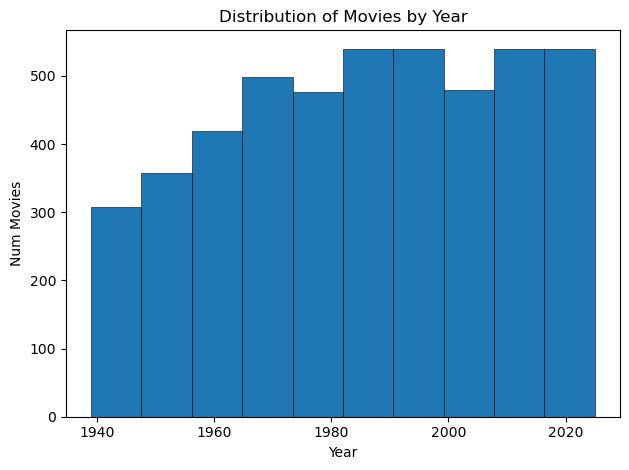

In [4]:
plt.hist(df['release_year'], edgecolor='black', linewidth=0.4)
plt.title("Distribution of Movies by Year")
plt.xlabel("Year")
plt.ylabel("Num Movies")
plt.tight_layout()
plt.show()

Kind of as expected, TMDB has much better capabilities for more recent and popular years, and some earlier years will have substantially less movies than later ones. We will try to account for this in our era subdivisions, but overall, we should be ok.

In [5]:
# Let's also make sure each entry in the csv has a corresponding image
res = []
for filename in df['filename']:
    if not os.path.exists(os.path.join("/Users/anubis/Desktop/Personal_Projects/movie-decade-classification/data/posters/", filename)):
        res.append(filename)
res

[]

##### Defining Film Eras:
Please check the <a href='https://github.com/Anubis-vc/movie-era-classification/blob/main/README.md'>README</a> for an in-depth discussion on how I chose these eras. As a reminder, I've attached the eras below:

1. *The Golden Age of Hollywood (1939 - 1949)*

2. *Post-War to New Hollywood Transition (1950 - 1966)*

3. *New Hollywood (1967 - 1982)*

4. *Blockbuster Era (1983 - 1994)*

5. *Indie and Digital Era (1995 - 2006)*

6. *Streaming and Superhero Era (2007 - 2017)*

7. *Modern Era/Post-Streaming (2018 - Current)* 

In [6]:
def find_era(year: int) -> str:
    if year < 1950:
        return "Golden Age"
    elif year < 1967:
        return "Post-War Transition"
    elif year < 1983:
        return "New Hollywood"
    elif year < 1995:
        return "Blockbuster Era"
    elif year < 2007:
        return "Digital Era"
    elif year < 2018:
        return "Franchise Era"
    else:
        return "Current Era"
    
df['temp'] = df['release_year'].apply(lambda x: find_era(x))
df['temp']

0        Golden Age
1        Golden Age
2        Golden Age
3        Golden Age
4        Golden Age
           ...     
4695    Current Era
4696    Current Era
4697    Current Era
4698    Current Era
4699    Current Era
Name: temp, Length: 4700, dtype: object

Though our dataset is small, it's good practice to vectorize data transformations for efficiency. I'm going to use the numpy select function though there is probably a way to do this in pure pandas I am unfamiliar with.

In [7]:
# clean up previous step
df.drop(columns=['temp'], inplace=True)

conditions = [
	df['release_year'] < 1950,
    df['release_year'] < 1967,
	df['release_year']< 1983,
 	df['release_year']< 1995,
    df['release_year']<  2007,
    df['release_year']< 2018
]

eras = ["Golden Age", "Post-War Transition", "New Hollywood", "Blockbuster Era", "Digital Era", "Franchise Era"]

df['era'] = np.select(conditions, eras, default="Current Era")
df


,filename,title,release_year,era
0,15.jpg,Citizen Kane,1941,Golden Age
1,16442.jpg,Sergeant York,1941,Golden Age
2,43266.jpg,How Green Was My Valley,1941,Golden Age
3,11462.jpg,Suspicion,1941,Golden Age
4,29884.jpg,Ball of Fire,1941,Golden Age
...,...,...,...,...
4695,1012201.jpg,HAIKYU!! The Dumpster Battle,2024,Current Era
4696,1408921.jpg,moi.digital untitled Volume 3,2024,Current Era
4697,1300939.jpg,Verguizas Cabronas,2024,Current Era
4698,1292380.jpg,moi.digital untitled Volume 2,2024,Current Era


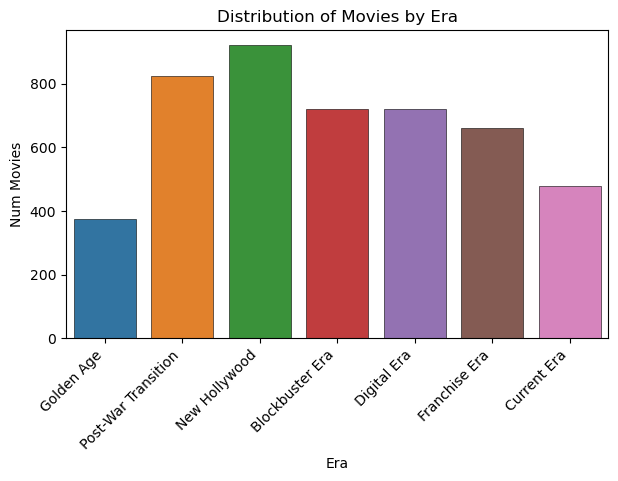

In [8]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='era', edgecolor='black', linewidth=0.4)
plt.title("Distribution of Movies by Era")
plt.xlabel("Era")
plt.ylabel("Num Movies")
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
era_to_int = {
    "Golden Age": 0,
    "Post-War Transition": 1,
    "New Hollywood": 2,
    "Blockbuster Era": 3,
    "Digital Era": 4,
    "Franchise Era": 5,
    "Current Era": 6
}

df['era_label'] = df['era'].map(era_to_int)
df

,filename,title,release_year,era,era_label
0,15.jpg,Citizen Kane,1941,Golden Age,0
1,16442.jpg,Sergeant York,1941,Golden Age,0
2,43266.jpg,How Green Was My Valley,1941,Golden Age,0
3,11462.jpg,Suspicion,1941,Golden Age,0
4,29884.jpg,Ball of Fire,1941,Golden Age,0
...,...,...,...,...,...
4695,1012201.jpg,HAIKYU!! The Dumpster Battle,2024,Current Era,6
4696,1408921.jpg,moi.digital untitled Volume 3,2024,Current Era,6
4697,1300939.jpg,Verguizas Cabronas,2024,Current Era,6
4698,1292380.jpg,moi.digital untitled Volume 2,2024,Current Era,6


In [10]:
# let's check for duplicate titles in case
df.sort_values(by='release_year')
duplicated = df.duplicated(subset=['title'])
print(np.sum(duplicated))

# by default, grabbing the latest duplicate title
latest_dups = df[duplicated]
latest_dups

105


,filename,title,release_year,era,era_label
186,787118.jpg,Rope,1947,Golden Age,0
761,1484868.jpg,To Catch a Thief,1958,Post-War Transition,1
893,686487.jpg,King Kong vs. Godzilla,1963,Post-War Transition,1
1250,10784.jpg,Cabaret,1972,New Hollywood,2
1335,141526.jpg,Fanny Hill,1968,New Hollywood,2
...,...,...,...,...,...
4500,505026.jpg,Death on the Nile,2022,Current Era,6
4530,447277.jpg,The Little Mermaid,2023,Current Era,6
4584,552524.jpg,Lilo & Stitch,2025,Current Era,6
4612,1087192.jpg,How to Train Your Dragon,2025,Current Era,6


It seems like these duplicates come from remakes sharing the same name. We can check this easily by taking a subset of title and year instead. Just for fun, let's also see when most of these remakes are from.

In [11]:
np.sum(df.duplicated(subset=['title', 'release_year']))

0

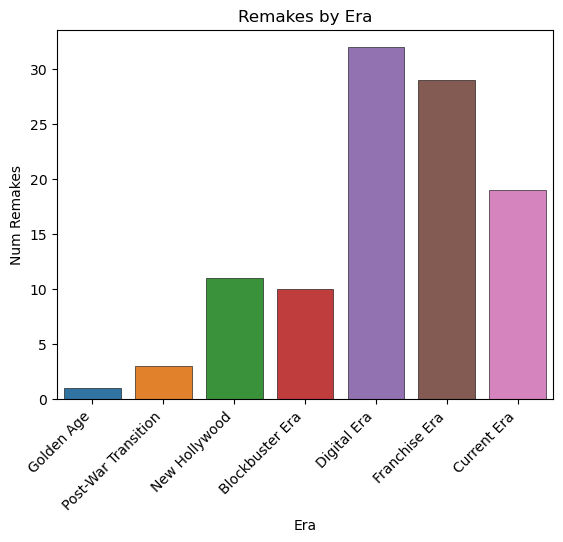

In [12]:
sns.countplot(data=latest_dups, x='era', edgecolor='black', linewidth=0.4)
plt.title("Remakes by Era")
plt.xlabel("Era")
plt.ylabel("Num Remakes")
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
# since total counts are different, let's find proportions instead
era_order = df['era'].drop_duplicates().tolist()
era_counts = df['era'].value_counts().reindex(era_order)
remake_counts = latest_dups['era'].value_counts().reindex(era_order)

proportions = (remake_counts / era_counts)
proportions

Golden Age             0.002660
Post-War Transition    0.003645
New Hollywood          0.011931
Blockbuster Era        0.013889
Digital Era            0.044444
Franchise Era          0.043939
Current Era            0.039666
Name: era, dtype: float64

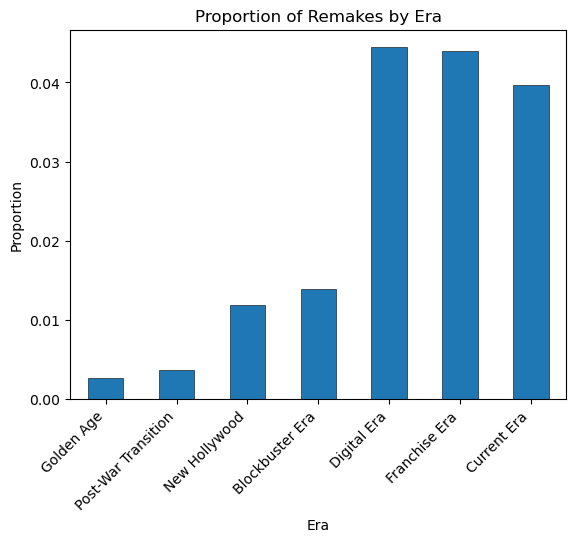

In [16]:
proportions.plot(kind='bar',
                 edgecolor='black',
                 linewidth=0.4,
                 xlabel='Era',
                 ylabel='Proportion',
                 title='Proportion of Remakes by Era')
plt.xticks(rotation=45, ha='right')
plt.show()

So clearly, the prevalence of remakes is something recent which does make sense: you have to have something to remake before you can remake it. That concludes some preliminary transformation of the metadata.

Let's also see if we can glean anything from the image data before we use it. 

<h3>Images</h3>